<a href="https://colab.research.google.com/github/shrey-cloud/CustomSpeechRecognizer/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Name: Tushar P Gavkhare 
###Date: 28/03/2022
###Roll no: A3_57
###Prn: 0120190374
#Feature Selection & PCA
#####link: https://colab.research.google.com/drive/1a-Dqwc80n6yLlH5qWw2NZtqL4rGUj7lT?usp=sharing 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('https://raw.githubusercontent.com/niranjangirhe/dataset/main/housing.csv', header=None, delimiter=r"\s+", names=column_names)

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
print(dataset)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [4]:
class PCA:
    
    # I will denote components as features here
    # Though its not mathematically accurate but machine learning it works 
    def __init__(self,number_of_important_features=2):
        # number of specified features
        # Default being passed as 2
        self.number_of_important_features=number_of_important_features
        # Best possible features
        self.features=None
        self._mean=None
        
        
    def fit(self,X):
        # placing mean to as origin of axis
        # axis =0 is mean of rows along the column direction 
        self._mean=np.mean(X,axis=0)
        X=X-self._mean
        
        # Co-variance of N,D -->DxD
        # Also called Autocorrelation as both are X's
        covariance=np.dot(X.T,X)/(X.shape[0]-1)
        print(covariance.shape)
        
        # Eigenvalues,eigenvectors detail discussion below
        # Eigenvector is the vector which doesnot chnage it span(simply, direction) after matrix transformation
        # So, why eigen importance. Best intuitive way to say
        # for 3D object, the eigenvector represents its axis of rotation(For earth eigenvector is the axis of rotation)
        # Formula A(matrix).v(eigenvector)=lambda(eigenvalue).v(eigenvector)
        # So, Intuitively above formula means, matrix transformation of eigenvector is the eigenvector scaled by eigenvalue
        # Here we are finding the eigenvector and eigenvalue of the covariance matrix
        # how to solve is (A-lambda.I(identity matrix))-v=0,  As v is non-zero --> det(A-lambda.I)=0(area under transformation=0)
        # Here lambda is the knob by tweaking it, we change the det = 0
        # We can do all this by only one line of code, isnt it awesome!!!
        # There is very powerful application of eigen's i.e eigenbasis-->diagonalisation()
        # A gift for the patience
        # you can say this to your gf or bf --> "My love for you is like eigenvector"
        eigenvalues,eigenvector=np.linalg.eig(covariance)
        print("eigenvalues-->",eigenvalues.shape)
        print("eigenvalues \n",eigenvalues)
        print("eigenvector-->",eigenvector.shape)
        print("eigenvector \n",eigenvector)
        #sort the eigenvalues from highest to lowest
        # If we didnt transpose, then applying indexs will require more steps and computation
        eigenvector=eigenvector.T
        print("eigenvector.T-->",eigenvector.shape)
        print("eigenvector after Transpose\n",eigenvector)
        indexs=np.argsort(eigenvalues)[::-1]
        #taking those indices and storing in eigenvalues and eigenvectors accordingly
        eigenvector=eigenvector[indexs]
        print("eigenvector-indexs-->",eigenvector.shape)
        print("eigenvector after indexes \n",eigenvector)
        eigenvalues=eigenvalues[indexs]
        print("eigenvalues-indexs-->",eigenvalues.shape)
        print("eigenvalues \n",eigenvalues)
        
        ## This below code snippet is for seeing how to determine which feature to be calculated
        total = sum(eigenvalues)
        variance_of_each_feature = [(i / total)*100 for i in eigenvalues]
        print("variance of each feature-->",variance_of_each_feature)
        
        # Now taking only number of specified componenets
        self.features=eigenvector[:self.number_of_important_features]
        print("self.features",self.features.shape)
        # So, now the we have chosen most significant features componenet
        
    def apply(self,X):
      # Here we project the data onto Principal component line
        X=X-self._mean
        # Check the dimensionality with (.shape) to confirm for yourselves
        # Here X-->(N,4);self.features-->2,4
        # (X,self.features.T)-->(N,4)x(4,2)==(N,2) i.e N samples with 2 feature vector 
        return np.dot(X,self.features.T)

In [5]:
X = dataset.iloc[:,:]

In [6]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [7]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
print(X[0:5])

[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623   0.15968566]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937 -0.10152429]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274   1.32424667]
 [-0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682  1.18275795]
 [-0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148  1.48750288]]


In [8]:
y = dataset['MEDV']

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
#I am going to use RandomForestRegressor algoritham as an estimator. Your can select other regression alogritham as well.
from sklearn.ensemble import RandomForestRegressor
#k_features=10 (It will get top 10 features best suited for prediction)
#forward=True (Forward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
model_forward=sfs(RandomForestRegressor(),n_features_to_select=7, direction = 'forward')
model_forward.fit(X,y)
model_backward=sfs(RandomForestRegressor(),n_features_to_select=7, direction = 'backward')
model_backward.fit(X,y)

In [ ]:
Wrapper_support_forward = model_forward.get_support()
Wrapper_support_backward = model_backward.get_support()
print(Wrapper_support_forward)
print(Wrapper_support_backward)
print(column_names)

[False False False  True False False False False  True False False False
 False  True]
[False False False  True False False  True False False False False False
 False  True]
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [ ]:
print("This are the selected features using Wrapper with Random FOrest and forward approach")
for i in range(14):
  if(Wrapper_support_forward[i] == True):
      print(column_names[i])
print("This are the selected features using Wrapper with Random FOrest and backward approach")
for i in range(14):
  if(Wrapper_support_backward[i] == True):
      print(column_names[i])

This are the selected features using Wrapper with Random FOrest and forward approach
CHAS
RAD
MEDV
This are the selected features using Wrapper with Random FOrest and backward approach
CHAS
AGE
MEDV


Embeded with Decision Tree

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

embeded_dt_selector = SelectFromModel(DecisionTreeRegressor(), threshold='1.25*median')
embeded_dt_selector.fit(X_norm, y)

SelectFromModel(estimator=DecisionTreeRegressor(), threshold='1.25*median')

In [ ]:
embeded_dt_support = embeded_dt_selector.get_support()
print(embeded_dt_support)
print(column_names)
#embeded_rf_feature = X.iloc[:,embeded_rf_support].columns.tolist()
#print(str(len(embeded_rf_feature)), 'selected features')

[ True False False False False  True  True  True False False  True False
  True  True]
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [ ]:
print("This are the selected features using Embeded with Decisiomn tree")
for i in range(14):
  if(embeded_dt_support[i] == True):
      print(column_names[i])
  

This are the selected features using Embeded with Decisiomn tree
CRIM
RM
AGE
DIS
PTRATIO
LSTAT
MEDV


PCA

In [ ]:
pca=PCA(2)

In [ ]:
pca.fit(X)

(14, 14)
eigenvalues--> (14,)
eigenvalues 
 [6.55895193 1.65279831 1.35157702 0.88829539 0.85258439 0.66131773
 0.53647102 0.40387475 0.06044612 0.13427506 0.27781262 0.25275696
 0.18334985 0.21321162]
eigenvector--> (14, 14)
eigenvector 
 [[ 2.42284451e-01 -6.58731079e-02  3.95077419e-01  1.00366211e-01
   4.95765921e-03  2.24627030e-01  7.77083366e-01  1.57401402e-01
  -5.91141759e-02 -9.70323119e-02 -2.54211798e-01  7.13846149e-02
  -6.32761157e-02 -7.10687807e-02]
 [-2.45435005e-01 -1.48002653e-01  3.94545713e-01  3.42958421e-01
   1.14495002e-01  3.35746944e-01 -2.74178365e-01 -3.80314042e-01
   9.62968067e-02  1.32375830e-01 -3.82899480e-01 -2.45579673e-01
   2.21122101e-01 -1.27709065e-01]
 [ 3.31859746e-01  1.27075668e-01 -6.60819134e-02 -9.62693566e-03
  -2.25836917e-02  8.08249519e-02 -3.40273839e-01  1.71745781e-01
   2.35472877e-01 -8.37168543e-02 -6.27048264e-01  2.54827026e-01
  -3.48408284e-01  2.73797614e-01]
 [-5.02713285e-03  4.10668763e-01 -1.25305293e-01  7.00406497

In [ ]:
projected=pca.apply(X)

In [ ]:
x0=projected[:,0]
x1=projected[:,1]

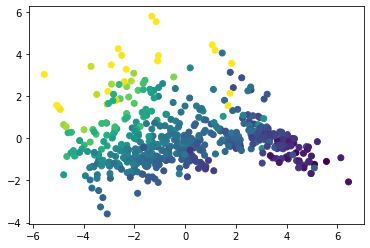

In [ ]:
plt.scatter(x0,x1,c=y)